In [773]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("train_data.csv")
df.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [774]:
df.drop(columns = ['ID','HealthServiceArea'],inplace=True,axis=1)
df.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


Drop the columns ID and HeatlServiceArea

#EDA and Statistics

In [775]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

The data has  categorical columns :
<br> 1.Gender
<br> 2.Race
<br> 3.PaymentTypology
<br> 4.Emergency Depearment Indicator 
<br> <b> Even though the columns CCSProcedureCode and APRSeverityofIllnessCode are numeric, they seem to be categorical in nature which must be verified 

In [776]:
df.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


Few observations from the description statistics:
    <br>1. The average LengthOfStay(LOS) is 2.53 and the min=1 and max=10
    <br>2. The average AverageCostInCounty is 2372 and AvergaeChargesInCounty is 7979 . whats the correlatio between these two ?
    <br><b> It would be intersting toobserve the correlation between these and the LengthOfStay(LOS)

In [777]:
col_values = df['LengthOfStay'].values
df.groupby(['LengthOfStay']).count()
#unique_val = pd.unique(col_values)
#print(sorted(unique_val))

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
LengthOfStay,,,,,,,,,,,,,
1,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895
2,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
3,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000
4,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504,7504
5,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342
6,557,557,557,557,557,557,557,557,557,557,557,557,557
7,346,346,346,346,346,346,346,346,346,346,346,346,346
8,145,145,145,145,145,145,145,145,145,145,145,145,145
9,97,97,97,97,97,97,97,97,97,97,97,97,97


The examples with < 4 days is 49895 and 10,071 >=4 days .
<br> 1. (<  4 days) => 83.36 %
<br> 2. (>=4 days) => 16.64 %



In [778]:
#So lets change the LengthOfStay 
def change_los(x):
    if x < 4:
        return 0
    return 1
df['LengthOfStay'] = df['LengthOfStay'].apply(change_los)

In [779]:
df.head(3)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,0


In [780]:
col_values = df['LengthOfStay'].values
df.groupby(['LengthOfStay']).count()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
LengthOfStay,,,,,,,,,,,,,
0,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895,49895
1,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071,10071


<b> So the above change was successful and this confirms our previous undesrtanding that the dat contains samples LOS < 4 

Lets now look at if there any NULL values 

In [781]:
df.isnull().any()

Gender                          False
Race                            False
TypeOfAdmission                 False
CCSProcedureCode                False
APRSeverityOfIllnessCode        False
PaymentTypology                 False
BirthWeight                     False
EmergencyDepartmentIndicator    False
AverageCostInCounty             False
AverageChargesInCounty          False
AverageCostInFacility           False
AverageChargesInFacility        False
AverageIncomeInZipCode          False
LengthOfStay                    False
dtype: bool

<b> So the dataset doesnot contain any NULL values 

#<b> Now lets do some data visualzation and find the distribution of the atributes and their correlation

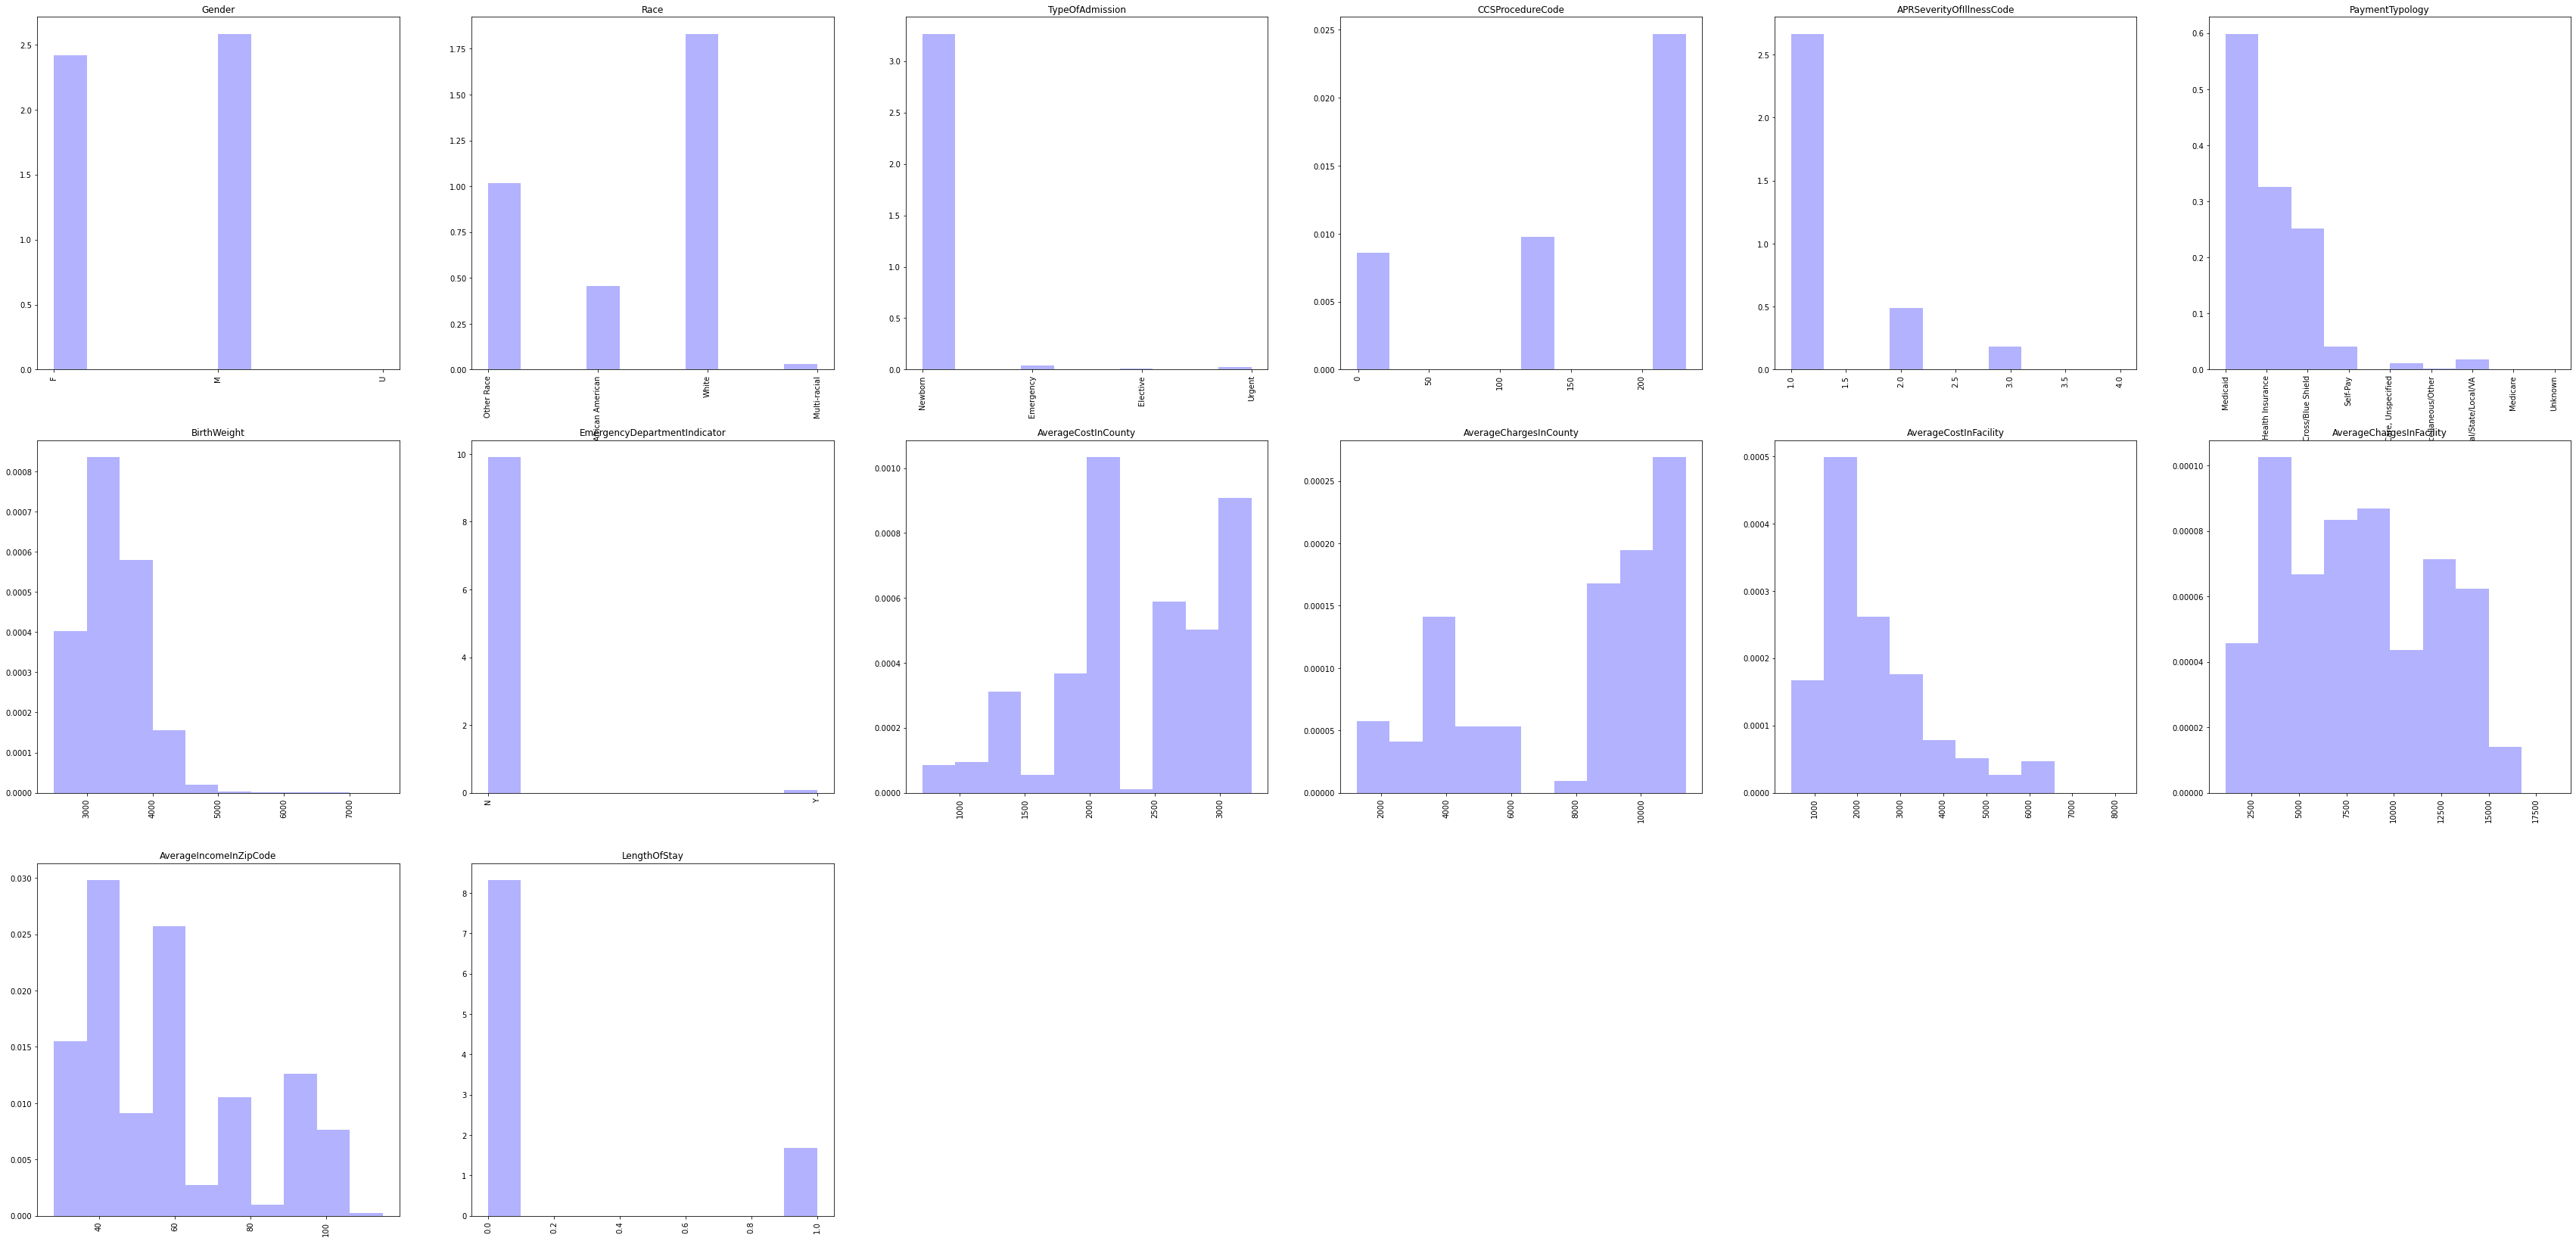

In [782]:
plt.figure(figsize=(60,60))
#plt.figure(figsize=(6,6))
for i,col in enumerate(df.columns):
    plt.subplot(6,6,i+1)
    plt.hist(df[col],alpha=0.3, color= 'b',density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [783]:

df[['Race','Gender']].groupby(['Race']).count()


,Gender
Race,
Black/African American,8183
Multi-racial,526
Other Race,18314
White,32943


In [784]:
df[['Race','Gender']].groupby(['Gender']).count()

,Race
Gender,
F,28987
M,30978
U,1


Key takeaways from the sample given:
    <br>Definitely the classes are imbalanced with respect to LengthofStay as the measure 
    <br> Females are 48.34 % and males form 51.66 % of the samples 
    <br> Whites are 54.94% ,30.54% other race and 13.65% Black/African American and remaining Multi racial 
   

In [785]:
df[['Race','TypeOfAdmission']].groupby(['TypeOfAdmission']).count()

,Race
TypeOfAdmission,
Elective,154
Emergency,659
Newborn,58741
Urgent,412


The large number of observations are related to Newborn (97.96%) with next highest being Emrgencies followed by Urgent and the lective samples are very eless

<b>So the next line of thoughts are to handle the Categorical variables and look at the distribution of the  attributes 

(array([4.03628723e-04, 8.36907581e-04, 5.80362205e-04, 1.55488110e-04,
        2.07450889e-05, 2.10119067e-06, 3.33522329e-07, 3.00170096e-07,
        1.00056699e-07, 3.33522329e-08]),
 array([2500., 3000., 3500., 4000., 4500., 5000., 5500., 6000., 6500.,
        7000., 7500.]),
 <BarContainer object of 10 artists>)

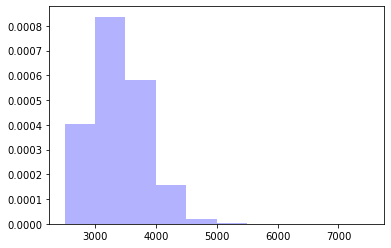

In [786]:
  plt.hist(df['BirthWeight'],alpha=0.3, color= 'b',density=True)

In [787]:
df['BirthWeight'].max()

7500

In [788]:
df['BirthWeight'].min()

2500

So the birth wight of 7500 looks like an outlier and we cannot assume the distribution is skewed rather anything above 5000 must be assumned to be an outlier condition

(array([0.00859539, 0.        , 0.        , 0.        , 0.        ,
        0.00979578, 0.        , 0.        , 0.        , 0.02471228]),
 array([ -1. ,  22.2,  45.4,  68.6,  91.8, 115. , 138.2, 161.4, 184.6,
        207.8, 231. ]),
 <BarContainer object of 10 artists>)

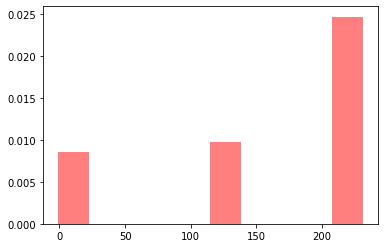

In [789]:
plt.hist(df['CCSProcedureCode'],alpha=0.5,color='r',density='True')

In [790]:
df[['CCSProcedureCode','LengthOfStay']].groupby(['CCSProcedureCode']).count()

,LengthOfStay
CCSProcedureCode,
-1,769
0,11189
115,13628
216,740
220,10773
228,19886
231,2981


<b>So the CCS procedure code is kind of fixed and we can assume that only specific codes . We can assume its ordinal in nature

(array([2.66556604e+00, 0.00000000e+00, 0.00000000e+00, 4.86942601e-01,
        0.00000000e+00, 0.00000000e+00, 1.80769102e-01, 0.00000000e+00,
        0.00000000e+00, 5.55870549e-05]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

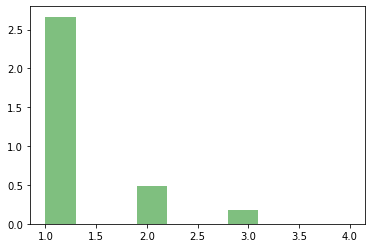

In [791]:
plt.hist(df['APRSeverityOfIllnessCode'],alpha=0.5,color='g',density='True')

In [792]:
string='APRSeverityOfIllnessCode'
df[['CCSProcedureCode',string]].groupby([string]).count()

,CCSProcedureCode
APRSeverityOfIllnessCode,
1,47953
2,8760
3,3252
4,1


(array([5.98735117e-01, 3.25351032e-01, 2.51663443e-01, 4.13567688e-02,
        0.00000000e+00, 1.13606043e-02, 2.45972718e-03, 1.76975286e-02,
        9.17186406e-04, 4.58593203e-04]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

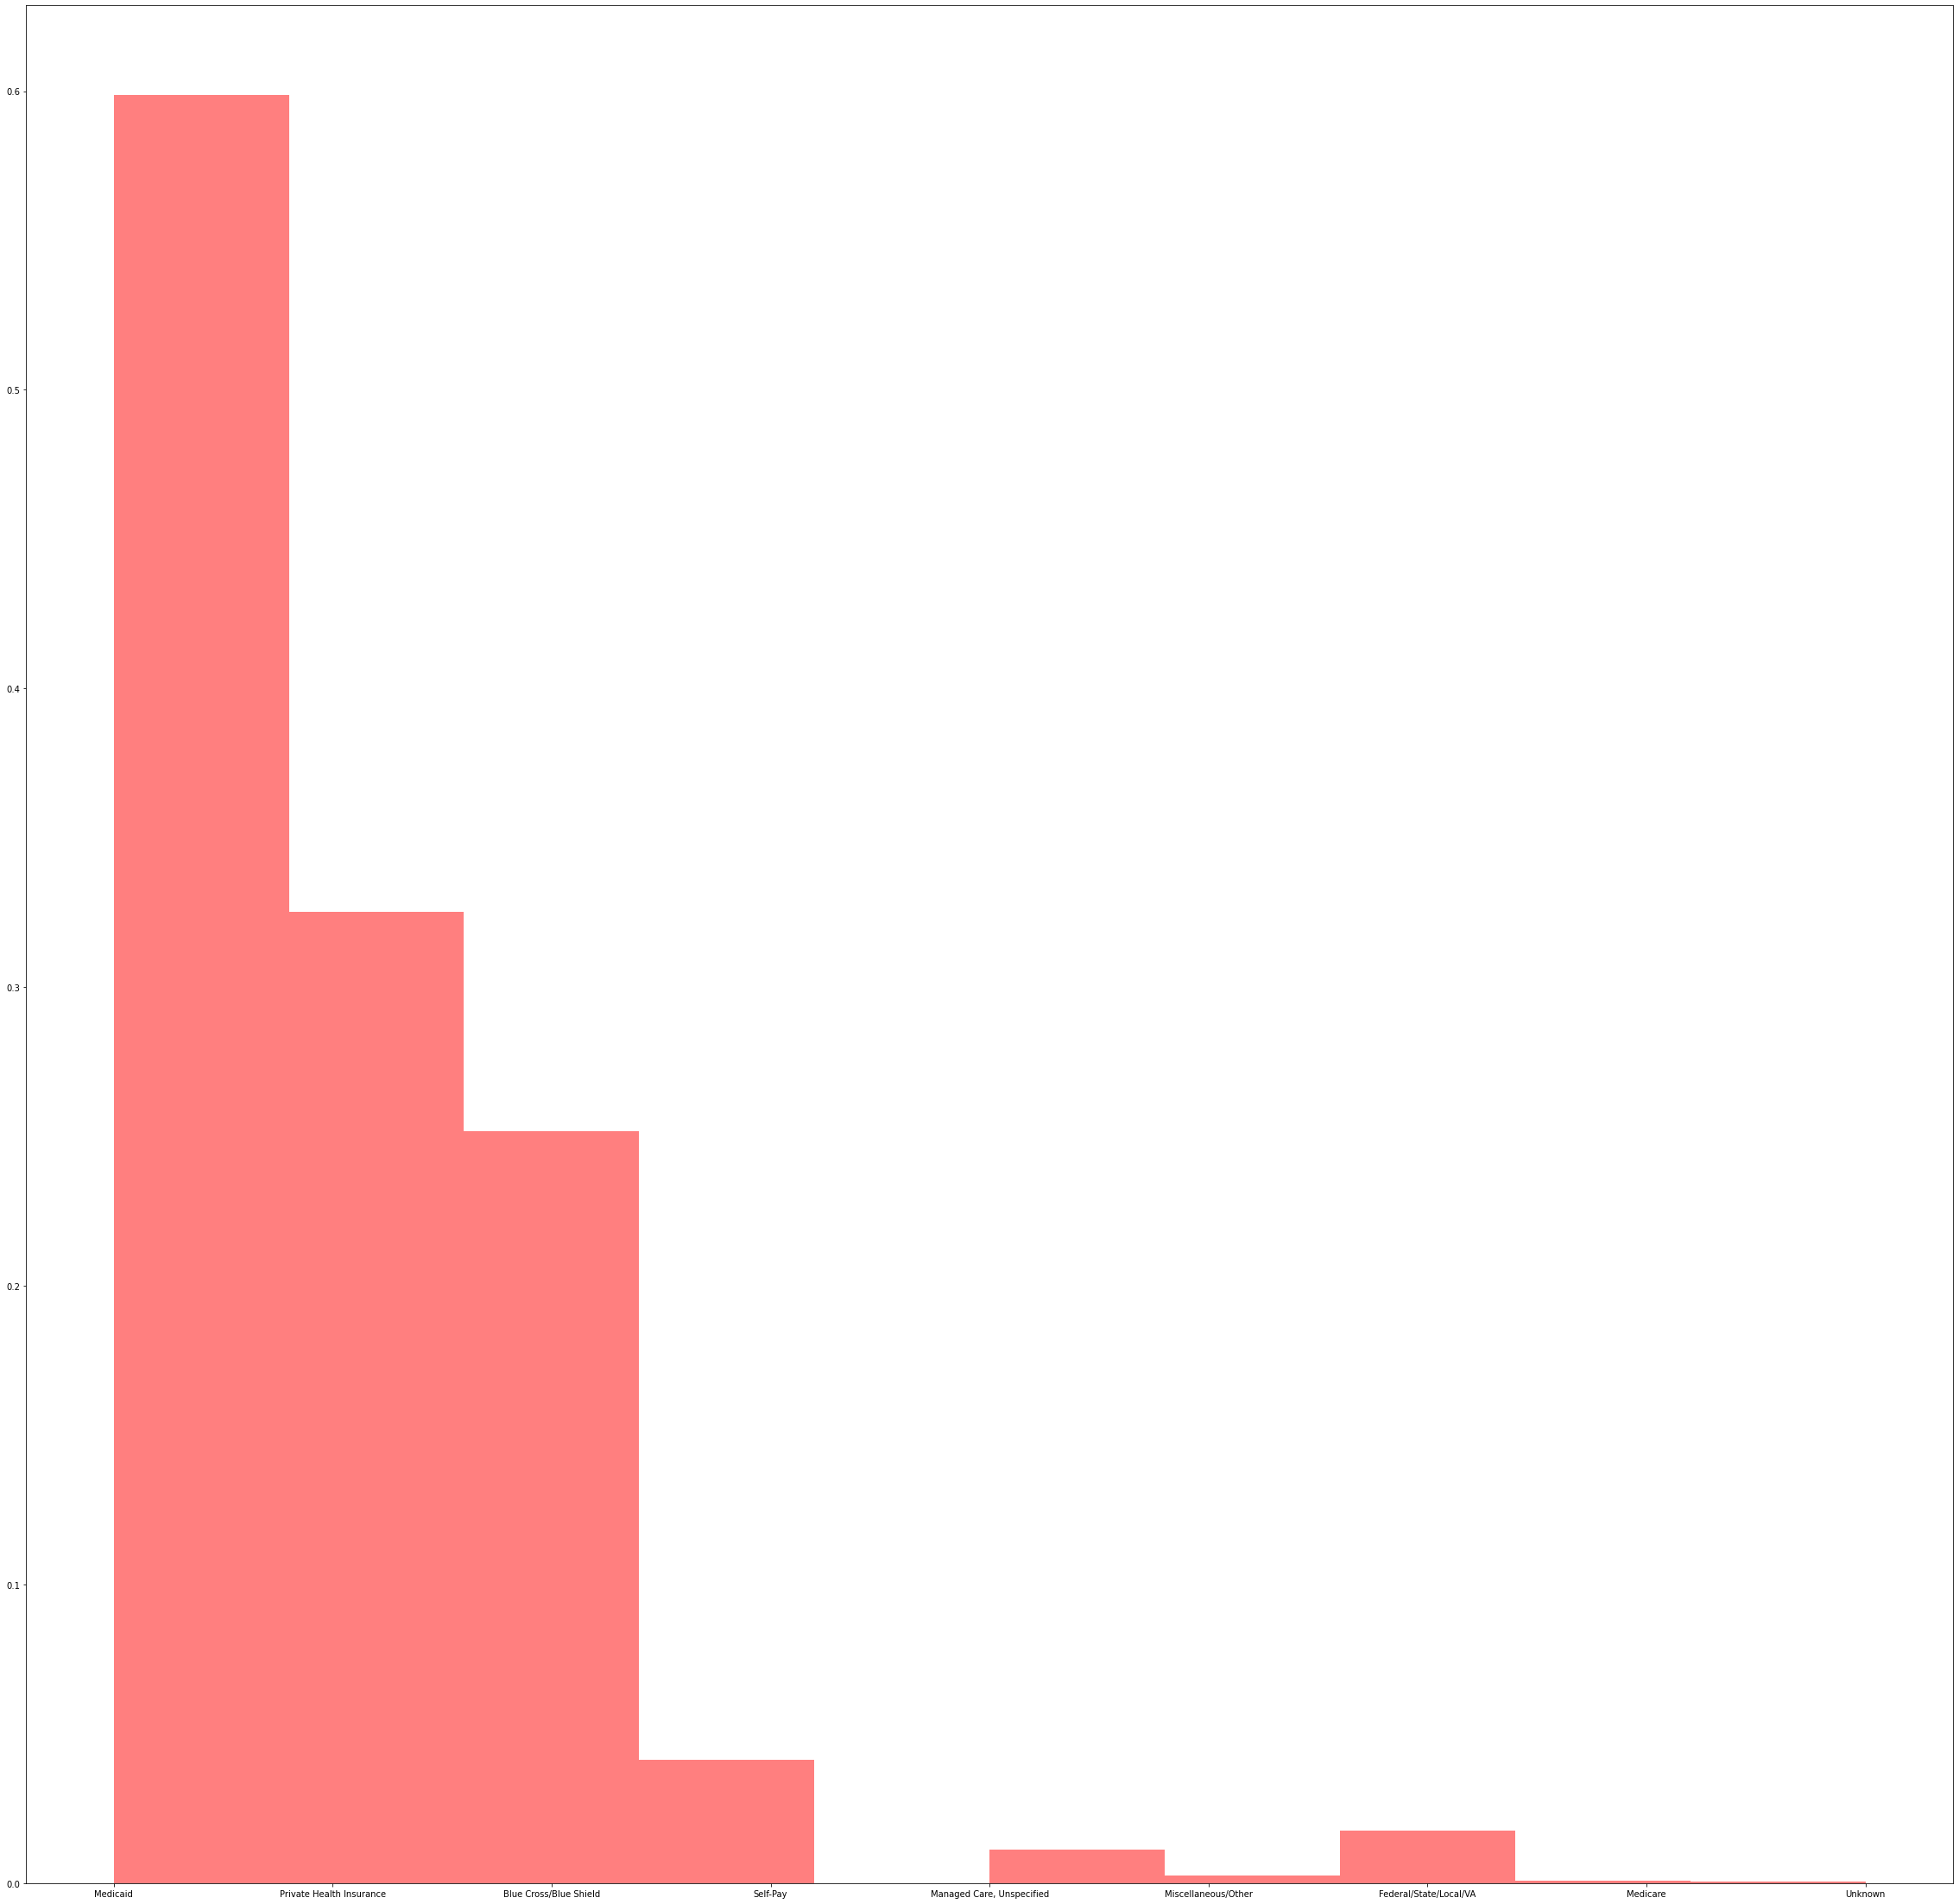

In [793]:
plt.figure(figsize=(40,40))
plt.hist(df['PaymentTypology'],alpha=0.5,color='r',density='True')

In [794]:
string='PaymentTypology'
df[['CCSProcedureCode',string]].groupby([string]).count()

,CCSProcedureCode
PaymentTypology,
Blue Cross/Blue Shield,12073
Federal/State/Local/VA,849
"Managed Care, Unspecified",545
Medicaid,28723
Medicare,44
Miscellaneous/Other,118
Private Health Insurance,15608
Self-Pay,1984
Unknown,22


(array([9.91445152, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08554848]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

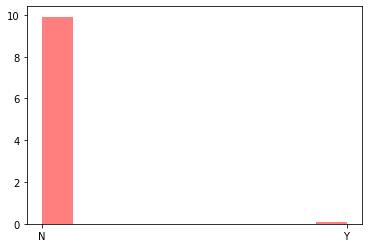

In [795]:
plt.hist(df['EmergencyDepartmentIndicator'],alpha=0.5,color='r',density='True')

So the severity code even though specified in numerical attribute its ordinal in nature 

<b> So far in our analysis
<br><b> Race - Nominal
<br><b> Gender - Nominal 
<br><b> PaymentTypology - Nominal
<br><b> EmergencyDepartmentIndicator- Nominal
<br><b> CCSProcedureCode -- Ordinal 
<br><b> APRSeverityOfIllnessCode - Ordinal 

(array([8.41715444e-05, 9.41244835e-05, 3.11836787e-04, 5.42468136e-05,
        3.66413168e-04, 1.03438062e-03, 9.95293908e-06, 5.87816627e-04,
        5.01733591e-04, 9.07892602e-04]),
 array([ 712.,  965., 1218., 1471., 1724., 1977., 2230., 2483., 2736.,
        2989., 3242.]),
 <BarContainer object of 10 artists>)

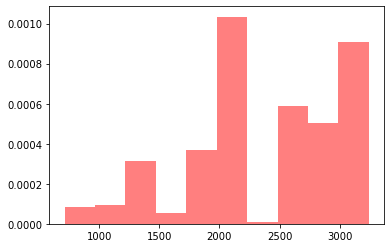

In [796]:
plt.hist(df['AverageCostInCounty'],alpha=0.5,color='r',density='True')

(array([5.71442381e-05, 4.09912036e-05, 1.41084090e-04, 5.32128988e-05,
        5.29661620e-05, 0.00000000e+00, 9.44179409e-06, 1.67748112e-04,
        1.94477930e-04, 2.69321419e-04]),
 array([ 1243. ,  2256.8,  3270.6,  4284.4,  5298.2,  6312. ,  7325.8,
         8339.6,  9353.4, 10367.2, 11381. ]),
 <BarContainer object of 10 artists>)

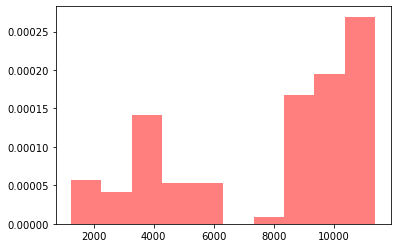

In [797]:
plt.hist(df['AverageChargesInCounty'],alpha=0.5,color='r',density='True')

(array([4.57617401e-05, 1.02646659e-04, 6.66813927e-05, 8.34959481e-05,
        8.67646438e-05, 4.35601774e-05, 7.12960220e-05, 6.23071087e-05,
        1.39784811e-05, 9.61381095e-09]),
 array([ 1120. ,  2854.6,  4589.2,  6323.8,  8058.4,  9793. , 11527.6,
        13262.2, 14996.8, 16731.4, 18466. ]),
 <BarContainer object of 10 artists>)

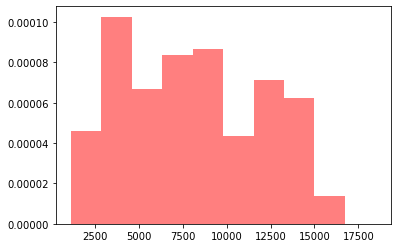

In [798]:
plt.hist(df['AverageChargesInFacility'],alpha=0.5,color='r',density='True')

(array([1.66521597e-04, 4.99129211e-04, 2.61042095e-04, 1.76431004e-04,
        7.82516475e-05, 5.12675698e-05, 2.68098464e-05, 4.65197659e-05,
        0.00000000e+00, 2.17789166e-08]),
 array([ 457. , 1222.7, 1988.4, 2754.1, 3519.8, 4285.5, 5051.2, 5816.9,
        6582.6, 7348.3, 8114. ]),
 <BarContainer object of 10 artists>)

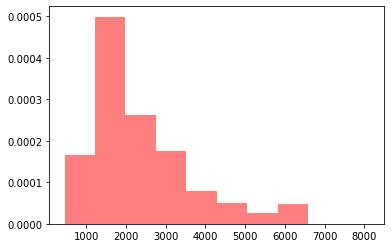

In [799]:
plt.hist(df['AverageCostInFacility'],alpha=0.5,color='r',density='True')

(array([0.01552987, 0.02981958, 0.00911436, 0.02569847, 0.00274868,
        0.01049829, 0.00100057, 0.01260293, 0.00765185, 0.00027794]),
 array([ 28. ,  36.7,  45.4,  54.1,  62.8,  71.5,  80.2,  88.9,  97.6,
        106.3, 115. ]),
 <BarContainer object of 10 artists>)

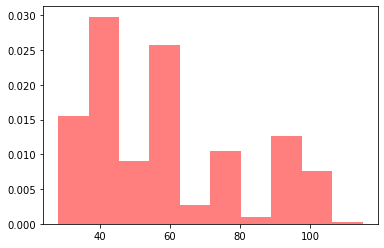

In [800]:
plt.hist(df['AverageIncomeInZipCode'],alpha=0.5,color='r',density='True')

lets focus on now changing the data accordingly and perform scaling etc before we send it to the model 

Before that lets look at the correlation too through scatterplot 

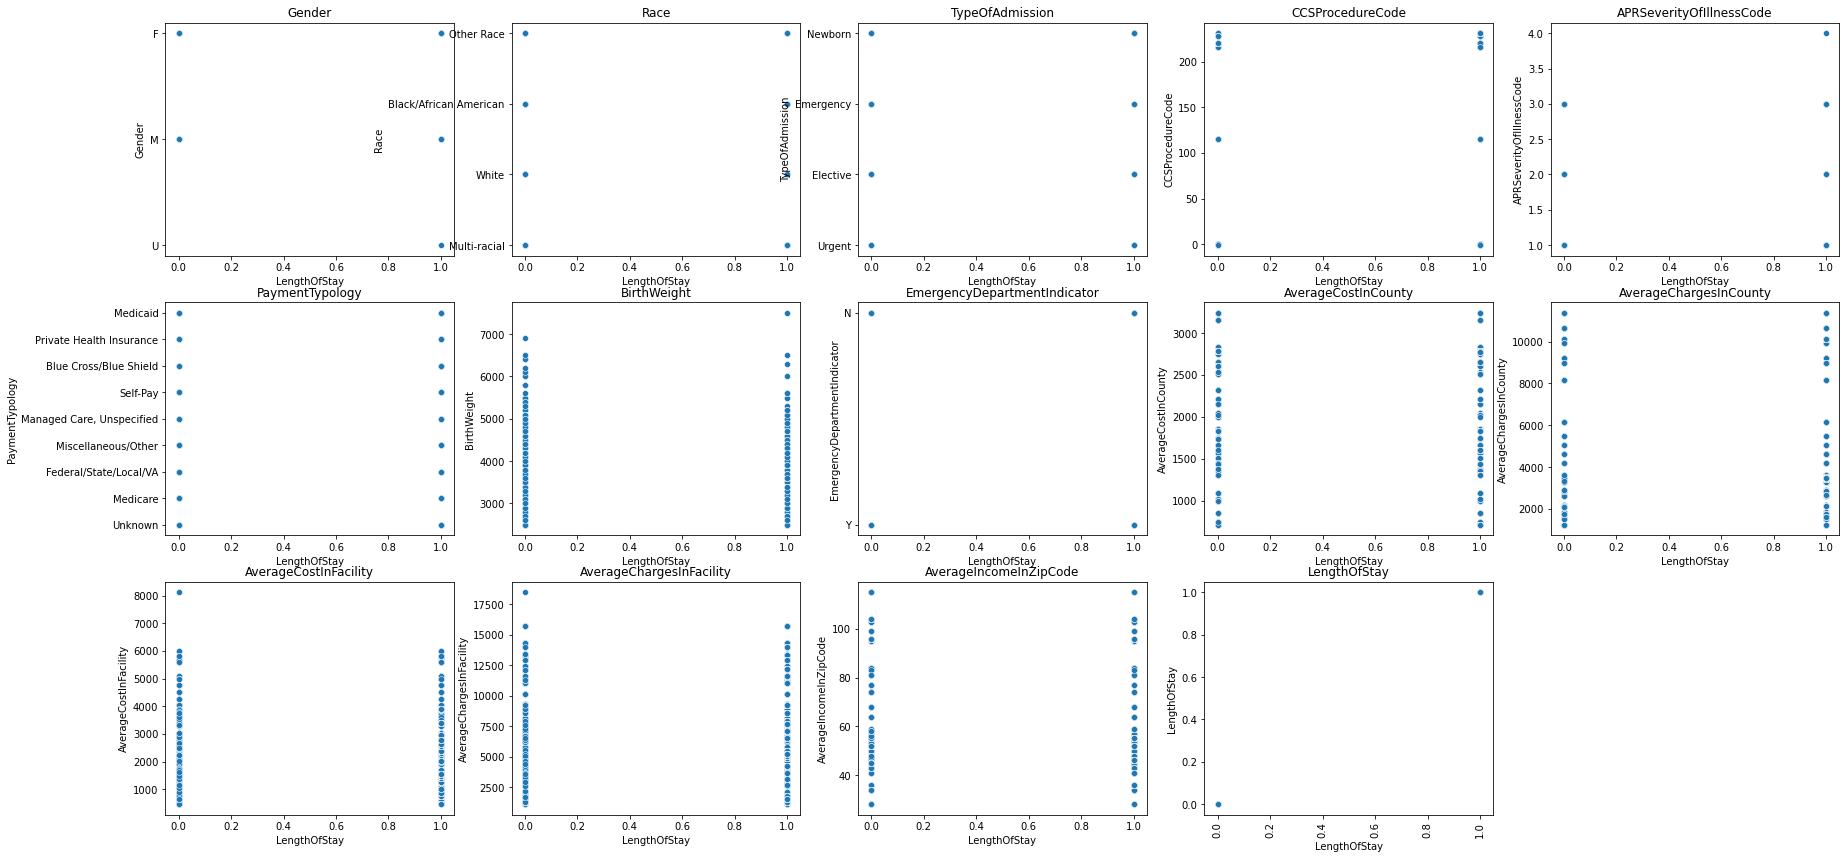

In [801]:
import seaborn as sns
plt.figure(figsize=(30,30))
for i,col in enumerate(df.columns):
    plt.subplot(6,5,i+1)
    sns.scatterplot(data=df,y=col,x='LengthOfStay')
    plt.title(col)
plt.xticks(rotation='vertical')
plt.show()

In [802]:
string='Race'
df.groupby([string,'LengthOfStay'])['Gender'].count()

Race                    LengthOfStay
Black/African American  0                6431
                        1                1752
Multi-racial            0                 449
                        1                  77
Other Race              0               15189
                        1                3125
White                   0               27826
                        1                5117
Name: Gender, dtype: int64

In [803]:
string='Gender'
df.groupby([string,'LengthOfStay'])['Gender'].count()

Gender  LengthOfStay
F       0               24449
        1                4538
M       0               25446
        1                5532
U       1                   1
Name: Gender, dtype: int64

If its a female , there is 97.85 chance of length of stay being less than 4 days 
if its a male 82% chance of length stay being less than 4 days 

In [804]:
string='PaymentTypology'
df.groupby([string,'LengthOfStay'])[string].count()

PaymentTypology            LengthOfStay
Blue Cross/Blue Shield     0                9952
                           1                2121
Federal/State/Local/VA     0                 747
                           1                 102
Managed Care, Unspecified  0                 445
                           1                 100
Medicaid                   0               24128
                           1                4595
Medicare                   0                  39
                           1                   5
Miscellaneous/Other        0                  97
                           1                  21
Private Health Insurance   0               12736
                           1                2872
Self-Pay                   0                1739
                           1                 245
Unknown                    0                  12
                           1                  10
Name: PaymentTypology, dtype: int64

<b>The next step is to identify the correlation 

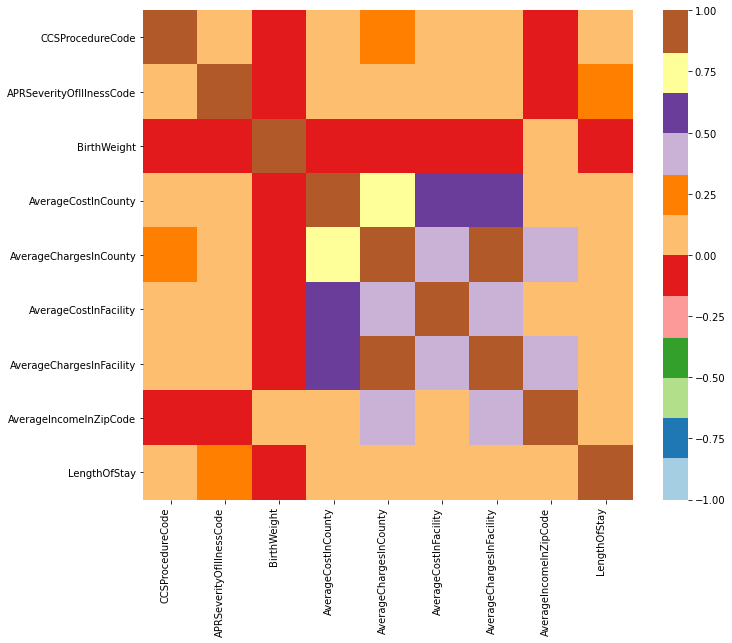

In [805]:
f,ax = plt.subplots(figsize=(11,9))
corr = df.corr()
#print(corr)
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,
                cmap='Paired',square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right');

<br><b> Some observations from the heatmap regarding the relationship between variables :</b>
<br>1.The AverageChargesInCounty and AverageChargesin Facility share a very strong correlation 
<br>2.AverageCostInCounty and AverageChargesInCounty share a little higher correlation around 0.75 
<br>3.AverageCostinFacility and AverageCostinCounty  0.5 
<br>4.AverageChargesinFacility and AverageCostInCounty 0.25 
<br>5.The LengthofStay and APRSSeverityOfIllnessCode seem to share some amount +ve correlation aroun 0.25 and all the others <br>6.share less than 0.25 correlation and BirthWeight seems to have  -ve correlation
<br><b> Ofcourse we have not mapped the relation of other categorical variables yet !!!</b>


<b>***Now lets look at the applying logistic Regression model to see the classification model performance :***

***Step 1: Lets convert the categorical variables usigng one-hot encoding :***


In [806]:
#Can we remove the unknown example as it might be an outlier and also unwanted extra colun for processing 
from sklearn.preprocessing import OneHotEncoder

def convert_to_categorical(df,colname):
    OneHotEncoder_race = OneHotEncoder(handle_unknown='ignore')
    OneHotEncoder_race.fit(df[[colname]])
    one_hot_ = OneHotEncoder_race.transform(df[[colname]]).toarray()
    #print(one_hot_.shape,OneHotEncoder_race.categories_)

    for i in range(len(OneHotEncoder_race.categories_[0])):
        df[colname+'_'+ str(OneHotEncoder_race.categories_[0][i])] = one_hot_[:,i]
    fd = df.drop([colname],axis=1)
    return fd
    



In [807]:
df = convert_to_categorical(df,'Gender')
df=convert_to_categorical(df,'Race')
df=convert_to_categorical(df,'TypeOfAdmission')
df=convert_to_categorical(df,'PaymentTypology')
df=convert_to_categorical(df,'EmergencyDepartmentIndicator')

In [808]:
df.head(3)

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,228,1,3700,2611,9227,1751,8951,45,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,228,1,2900,3242,8966,3338,6409,34,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,220,1,3200,3155,11381,4980,9323,45,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [809]:
df.shape

(59966, 31)

In [810]:
#Lets look at the train and test performance now with the most basic model which we shall use as a reference for now
#After this write a function that takes a filename does the processinand gives a dataframe with onehot-encoded 
df_test = pd.read_csv('test_data.csv')
df_test.shape


(69177, 15)

In [811]:
df_test.head(3)
df_test = df_test.drop(['ID','HealthServiceArea'],axis=1)
df_test.head(3)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74


In [812]:
df_test =convert_to_categorical(df_test,'Gender')
df_test =convert_to_categorical(df_test,'Race')
df_test =convert_to_categorical(df_test,'TypeOfAdmission')
df_test =convert_to_categorical(df_test,'PaymentTypology')
df_test =convert_to_categorical(df_test,'EmergencyDepartmentIndicator')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69177 entries, 0 to 69176
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CCSProcedureCode                           69177 non-null  int64  
 1   APRSeverityOfIllnessCode                   69177 non-null  int64  
 2   BirthWeight                                69177 non-null  int64  
 3   AverageCostInCounty                        69177 non-null  int64  
 4   AverageChargesInCounty                     69177 non-null  int64  
 5   AverageCostInFacility                      69177 non-null  int64  
 6   AverageChargesInFacility                   69177 non-null  int64  
 7   AverageIncomeInZipCode                     69177 non-null  int64  
 8   Gender_F                                   69177 non-null  float64
 9   Gender_M                                   69177 non-null  float64
 10  Gender_U              

In [813]:
print("Test  = ",df_test.shape)
print("Train = ",df.shape)
#The additonal one is Lengthofstay works good 
#There is one extra PaymentTypology Department of Corrections 

Test  =  (69177, 32)
Train =  (59966, 31)


In [814]:

with pd.option_context('mode.chained_assignment',None):
    train_data,test_data = train_test_split(df,test_size=0.2,shuffle=True,random_state=0)
with pd.option_context('mode.chained_assignment',None):
    train_data,val_data = train_test_split(train_data,test_size=0.25,shuffle=True,random_state=0)
print(train_data.shape,val_data.shape,test_data.shape)

(35979, 31) (11993, 31) (11994, 31)


In [815]:
train_X = train_data.drop(['LengthOfStay'],axis=1).to_numpy()
train_y = train_data['LengthOfStay'].to_numpy()

test_X = test_data.drop(['LengthOfStay'],axis=1).to_numpy()
test_y = test_data['LengthOfStay'].to_numpy()

val_X = val_data.drop(['LengthOfStay'],axis=1).to_numpy()
val_y = val_data['LengthOfStay'].to_numpy()

In [816]:
from sklearn.metrics import f1_score


def print_f1_scores(clf,train_X,train_y,val_X,val_y,tag):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    train_f1 = balanced_accuracy_score(train_y,train_pred)
    val_f1   = balanced_accuracy_score(val_y,val_pred)
    
    print("Train   balanced accuracy score:{:.3f}".format(train_f1))
    print("Train            accuracy score:{:.3f}".format(accuracy_score(train_y,train_pred)))
    print(tag," balanced accuracy score:{:.3f}".format(val_f1))
    
    print(tag,"          accuracy score:{:.3f}".format(accuracy_score(val_y,val_pred)))
    
def print_classification_report(model,X,y,tag=" "):
    pred = model.predict(X)
    label_0=tag+"_"+"L0"
    label_1=tag+"_" +"L1"
    label_names = [label_0,label_1]
    print(classification_report(y,pred,target_names=label_names))

In [817]:

clf = LogisticRegression(random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X,train_y.ravel())
print_f1_scores(clf,train_X,train_y,val_X,val_y,"Validation")

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Validation  balanced accuracy score:0.640
Validation           accuracy score:0.690


In [818]:
clf_l1 = LogisticRegression(penalty='l1',C=0.75,random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X,train_y.ravel())
print_f1_scores(clf_l1,train_X,train_y,val_X,val_y,"Validation")

Train   balanced accuracy score:0.648
Train            accuracy score:0.696
Validation  balanced accuracy score:0.640
Validation           accuracy score:0.690


In [819]:
clf_l2 = LogisticRegression(penalty='l2',C=0.75,random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X,train_y.ravel())
print_f1_scores(clf_l2,train_X,train_y,val_X,val_y,"Validation")

Train   balanced accuracy score:0.647
Train            accuracy score:0.695
Validation  balanced accuracy score:0.641
Validation           accuracy score:0.691


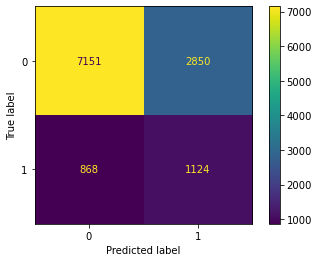

In [820]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(clf,val_X,val_y)

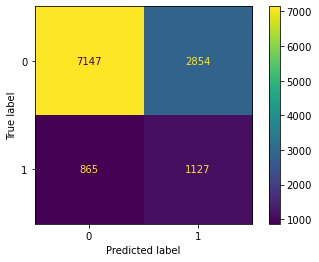

In [821]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(clf_l1,val_X,val_y)

In [822]:
print_classification_report(clf,val_X,val_y,"validation")

               precision    recall  f1-score   support

validation_L0       0.89      0.72      0.79     10001
validation_L1       0.28      0.56      0.38      1992

     accuracy                           0.69     11993
    macro avg       0.59      0.64      0.59     11993
 weighted avg       0.79      0.69      0.72     11993



In [823]:
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import  StandardScaler

MinMaxScaler_Train = MinMaxScaler().fit(train_X)
train_X_scale= MinMaxScaler_Train.transform(train_X)

In [824]:
val_X_scale = MinMaxScaler_Train.transform(val_X)

In [825]:
clf_scale = LogisticRegression(random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X_scale,train_y.ravel())
print_f1_scores(clf_scale,train_X_scale,train_y,val_X_scale,val_y,"Validation LogReg Scale")

Train   balanced accuracy score:0.648
Train            accuracy score:0.696
Validation LogReg Scale  balanced accuracy score:0.640
Validation LogReg Scale           accuracy score:0.690


In [826]:
StandardScaler_Train = StandardScaler().fit(train_X)
train_X_std= StandardScaler_Train.transform(train_X)
val_X_std = StandardScaler_Train.transform(val_X)
clf_std = LogisticRegression(random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X_std,train_y.ravel())
print_f1_scores(clf_std,train_X_std,train_y,val_X_std,val_y,"Validation LogReg Standard")


Train   balanced accuracy score:0.648
Train            accuracy score:0.696
Validation LogReg Standard  balanced accuracy score:0.640
Validation LogReg Standard           accuracy score:0.690


In [827]:
print_classification_report(clf_scale,val_X,val_y,"validation_log_reg_scale")

                             precision    recall  f1-score   support

validation_log_reg_scale_L0       0.86      0.46      0.60     10001
validation_log_reg_scale_L1       0.18      0.62      0.28      1992

                   accuracy                           0.48     11993
                  macro avg       0.52      0.54      0.44     11993
               weighted avg       0.74      0.48      0.54     11993



<b>The precision for L0 is good whereas the precision for LOS =1 is not that great with this model 

In [828]:
StandardScaler_Train = StandardScaler().fit(train_X)
train_X_std= StandardScaler_Train.transform(train_X)
val_X_std = StandardScaler_Train.transform(val_X)
clf_std = LogisticRegression(penalty='l2',C=0.75,random_state=0,solver='liblinear',max_iter=1000,class_weight='balanced').fit(train_X_std,train_y.ravel())
print_f1_scores(clf_std,train_X_std,train_y,val_X_std,val_y,"Validation LogReg StandardScaling")

Train   balanced accuracy score:0.648
Train            accuracy score:0.696
Validation LogReg StandardScaling  balanced accuracy score:0.640
Validation LogReg StandardScaling           accuracy score:0.690


In [829]:
val_pred = clf_std.predict(val_X_std)
from sklearn.metrics import classification_report
label_names = ['L0','L1']
print(classification_report(val_y,val_pred,target_names=label_names))

              precision    recall  f1-score   support

          L0       0.89      0.72      0.79     10001
          L1       0.28      0.56      0.38      1992

    accuracy                           0.69     11993
   macro avg       0.59      0.64      0.59     11993
weighted avg       0.79      0.69      0.72     11993



<b> So since there is a class imbalance the data works extremely good with LOS=0 with precision being .90

In [830]:
test_pred = clf.predict(test_X)
from sklearn.metrics import classification_report
label_names = ['L0','L1']
print_classification_report(clf,test_X,test_y,tag="Test LogReg")

                precision    recall  f1-score   support

Test LogReg_L0       0.89      0.72      0.79      9943
Test LogReg_L1       0.30      0.58      0.39      2051

      accuracy                           0.69     11994
     macro avg       0.59      0.65      0.59     11994
  weighted avg       0.79      0.69      0.73     11994



In [831]:
print_f1_scores(clf,train_X,train_y,test_X,test_y,"Test LogReg ")

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Test LogReg   balanced accuracy score:0.648
Test LogReg            accuracy score:0.693


<b> So the test score is also 0.648 !!!

In [832]:
print_f1_scores(clf,train_X,train_y,test_X,test_y,"Test LogReg")

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Test LogReg  balanced accuracy score:0.648
Test LogReg           accuracy score:0.693


In [833]:
print_f1_scores(clf,train_X,train_y,val_X,val_y,"Validation logReg")

Train   balanced accuracy score:0.648
Train            accuracy score:0.695
Validation logReg  balanced accuracy score:0.640
Validation logReg           accuracy score:0.690


In [834]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=16, random_state=0)
rf.fit(train_X, train_y)
print_f1_scores(rf,train_X,train_y,val_X,val_y,"RF Train ")
print_f1_scores(rf,train_X,train_y,test_X,test_y,"RF Test ")

Train   balanced accuracy score:0.695
Train            accuracy score:0.897
RF Train   balanced accuracy score:0.576
RF Train            accuracy score:0.843
Train   balanced accuracy score:0.695
Train            accuracy score:0.897
RF Test   balanced accuracy score:0.565
RF Test            accuracy score:0.834


In [835]:
rf = RandomForestClassifier(min_samples_split=4, random_state=0)
rf.fit(train_X, train_y)
print_f1_scores(rf,train_X,train_y,val_X,val_y, "RF Validation ")
print_f1_scores(rf,train_X,train_y,test_X,test_y,"RF Validation ")

Train   balanced accuracy score:0.813
Train            accuracy score:0.931
RF Validation   balanced accuracy score:0.588
RF Validation            accuracy score:0.824
Train   balanced accuracy score:0.813
Train            accuracy score:0.931
RF Validation   balanced accuracy score:0.586
RF Validation            accuracy score:0.821


In [836]:
print_classification_report(rf,train_X,train_y,tag="RF Train ")
print_classification_report(rf,val_X,val_y    ,tag="RF Validation ")

              precision    recall  f1-score   support

RF Train _L0       0.93      0.99      0.96     29951
RF Train _L1       0.93      0.63      0.76      6028

    accuracy                           0.93     35979
   macro avg       0.93      0.81      0.86     35979
weighted avg       0.93      0.93      0.93     35979

                   precision    recall  f1-score   support

RF Validation _L0       0.86      0.94      0.90     10001
RF Validation _L1       0.44      0.23      0.31      1992

         accuracy                           0.82     11993
        macro avg       0.65      0.59      0.60     11993
     weighted avg       0.79      0.82      0.80     11993



In [837]:
print_classification_report(rf,test_X,test_y  ,tag="RF Test ")

              precision    recall  f1-score   support

 RF Test _L0       0.86      0.94      0.90      9943
 RF Test _L1       0.45      0.23      0.30      2051

    accuracy                           0.82     11994
   macro avg       0.66      0.59      0.60     11994
weighted avg       0.79      0.82      0.80     11994



In [838]:
from sklearn.metrics import *
train_acc=list()
val_acc  =list()
train_class = list()
val_class = list()
for split in [2,4,6,8,10,12,14]:
    rf = RandomForestClassifier(min_samples_split=split, random_state=0)
    rf.fit(train_X, train_y)
    pred_train_y = rf.predict(train_X)
    pred_val_y   = rf.predict(val_X)
    train_acc.append(balanced_accuracy_score(train_y,pred_train_y))
    val_acc.append(balanced_accuracy_score(val_y,pred_val_y))
    labels_target = ['1']
    report = f1_score(train_y,pred_train_y,labels=labels_target)
    
    print(report)
    train_class.append(classification_report(train_y,pred_train_y))
    val_class.append(classification_report(val_y,pred_val_y))
    print(classification_report(val_y,pred_val_y))
    

0.8664018775952337
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10001
           1       0.40      0.25      0.31      1992

    accuracy                           0.81     11993
   macro avg       0.63      0.59      0.60     11993
weighted avg       0.78      0.81      0.79     11993

0.7560999703645164
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10001
           1       0.44      0.23      0.31      1992

    accuracy                           0.82     11993
   macro avg       0.65      0.59      0.60     11993
weighted avg       0.79      0.82      0.80     11993

0.657566385837688
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10001
           1       0.50      0.21      0.30      1992

    accuracy                           0.83     11993
   macro avg       0.68      0.59      0.60     11993
weighted avg      

In [839]:
print(len(train_acc))
print(train_acc)

7
[0.8938688804410175, 0.8129613277665619, 0.7512827050162911, 0.7161802703982973, 0.694514604998383, 0.6745908108658873, 0.6600731233055575]


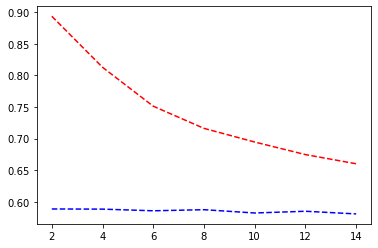

In [840]:
splits=[2,4,6,8,10,12,14]
plt.plot(splits,train_acc,'r--')
plt.plot(splits,val_acc,'b--')
plt.show()

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     10001
           1       0.84      0.01      0.03      1992

    accuracy                           0.84     11993
   macro avg       0.84      0.51      0.47     11993
weighted avg       0.84      0.84      0.76     11993

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     10001
           1       0.80      0.06      0.11      1992

    accuracy                           0.84     11993
   macro avg       0.82      0.53      0.51     11993
weighted avg       0.83      0.84      0.78     11993

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     10001
           1       0.71      0.09      0.16      1992

    accuracy                           0.84     11993
   macro avg       0.78      0.54      0.53     11993
weighted avg       0.82      0.84      0.79     11993

              preci

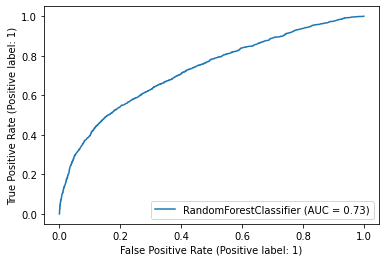

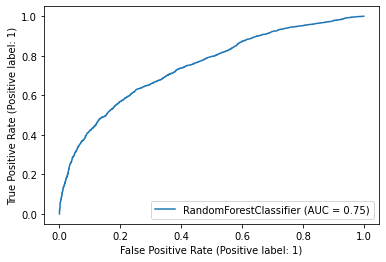

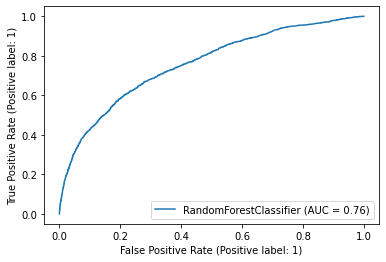

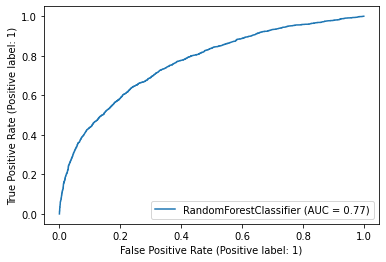

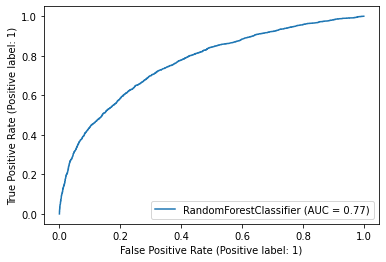

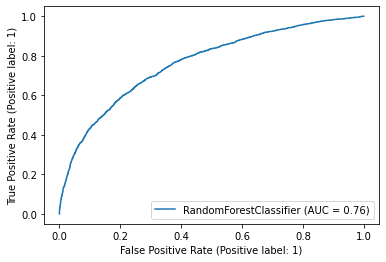

In [843]:
from sklearn.metrics import *
train_acc=list()
val_acc  =list()
train_class = list()
val_class = list()
for depth in [4,6,8,10,12,14]:
    rf = RandomForestClassifier(max_depth=depth, random_state=0)
    rf.fit(train_X, train_y)
    pred_train_y = rf.predict(train_X)
    pred_val_y   = rf.predict(val_X)
    train_acc.append(balanced_accuracy_score(train_y,pred_train_y))
    val_acc.append(balanced_accuracy_score(val_y,pred_val_y))
    #labels_target = ['0','1']
    #report = f1_score(train_y,pred_train_y,labels=labels_target)
    
    #print(report)
    train_class.append(classification_report(train_y,pred_train_y))
    val_class.append(classification_report(val_y,pred_val_y))
    print(classification_report(val_y,pred_val_y))
    plot_roc_curve(rf,val_X,val_y)

print(train_acc)
    

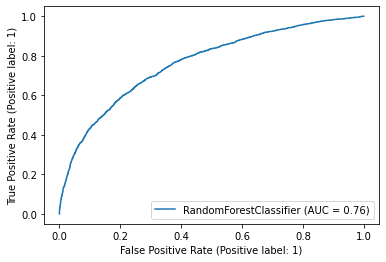

In [842]:
plot_roc_curve(rf,val_X,val_y)

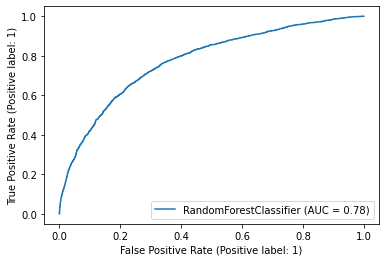

In [844]:
rf = RandomForestClassifier(max_depth=12, random_state=0)
rf.fit(train_X, train_y)
pred_test_y = rf.predict(test_X)
plot_roc_curve(rf,test_X,test_y)

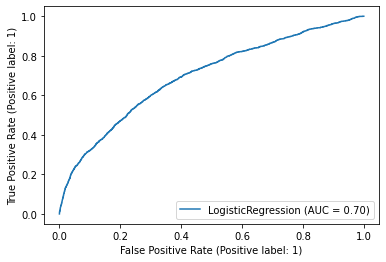

In [845]:
plot_roc_curve(clf,test_X,test_y)

<b>So we shall choose the randomforest classifier at depth 12 as our model giving slightly better AUC around 0.76

<b>***Finally lets generate the prediction ***